<a href="https://colab.research.google.com/github/naenumtou/deepLearning/blob/main/autoencoder_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense

%config InlineBackend.figure_format = 'retina'

In [ ]:
# Loading faces dataset
df = fetch_lfw_people(min_faces_per_person = 70)

In [ ]:
# Extra data
faces = df['data']
labels = df['target']
names = df['target_names']

print(f'Faces images shape: {faces.shape}')
print(f'Targets images shape: {labels.shape}')
print(f'Target names: {names}, Total names: {len(names)}')

Faces images shape: (1288, 2914)
Targets images shape: (1288,)
Target names: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair'], Total names: 7


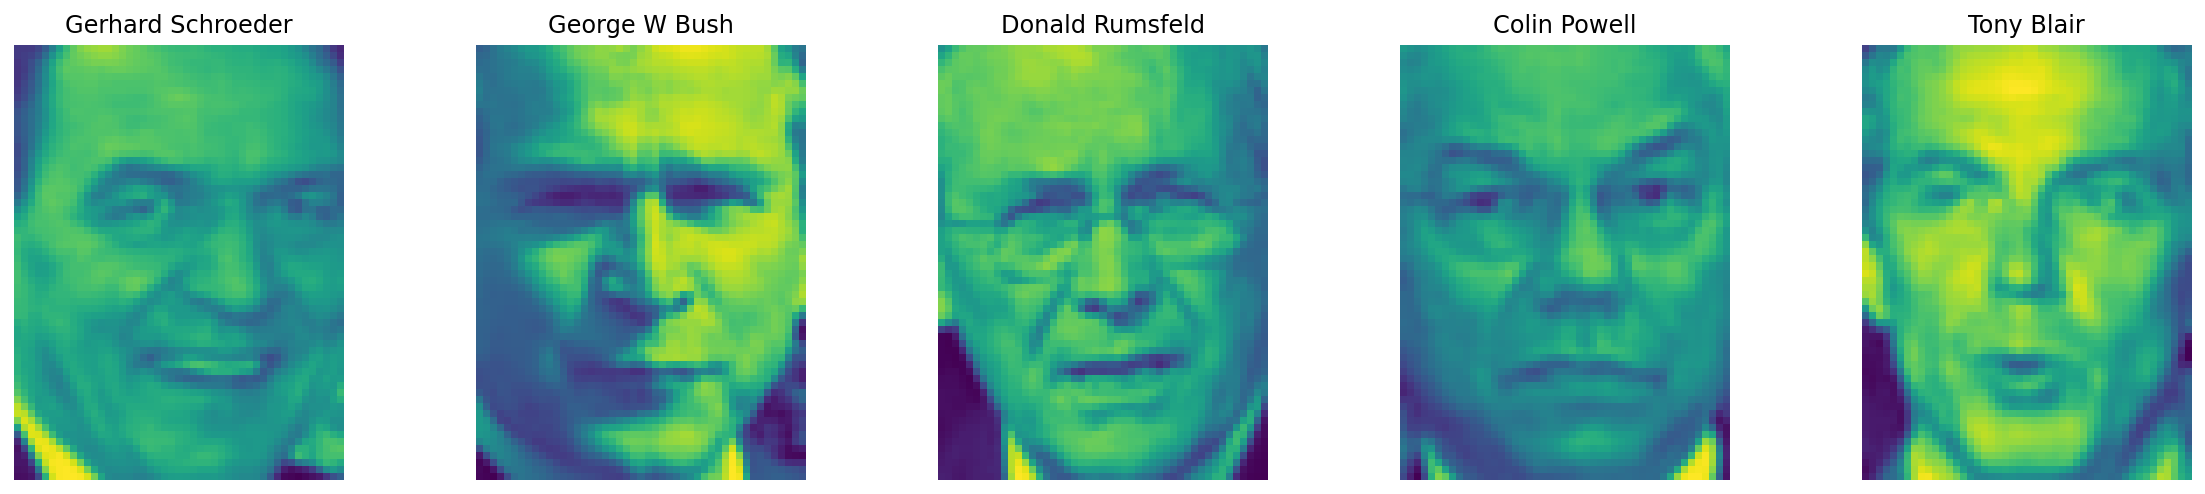

In [ ]:
# Show example image
n = 5
random = np.random.choice(faces.shape[0], n)

# Define function
def exampleImage(dataImage, dataLabel):
  plt.figure(figsize = (4 * n, 4))
  for j, i in enumerate(random):
    plt.subplot(1, n, j + 1)
    plt.imshow(dataImage[i].reshape(62, -1)) #Images size (62 x 47)
    plt.title(names[dataLabel[i]])
    plt.axis('off')  
  return plt.show()

# Show image function
exampleImage(faces, labels)

In [ ]:
# Train test splits
trainX, testX, trainY, testY = train_test_split(faces, labels, test_size = 0.2, random_state = 777)

print(f'Training images shape: {trainX.shape}')
print(f'Training labels shape: {trainY.shape}')
print(f'Testing images shape: {testX.shape}')
print(f'Testing labels shape: {testY.shape}')

Training images shape: (1030, 2914)
Training labels shape: (1030,)
Testing images shape: (258, 2914)
Testing labels shape: (258,)


In [ ]:
# Normalisation
trainXnormal = trainX / 255.0
testXnormal = testX / 255.0

In [ ]:
# Autoencoder model
epoch = 50
batch_size = 64

# Encoder architecture
input_layer = Input(shape = trainXnormal.shape[1])
encoder = Dense(trainXnormal.shape[1] // 2, activation = 'relu')(input_layer)
encoder = Dense(trainXnormal.shape[1] // 4, activation = 'relu')(encoder)
encoder = Dense(trainXnormal.shape[1] // 8, activation = 'relu')(encoder)
decoder = Dense(trainXnormal.shape[1] // 4, activation = 'relu')(encoder)
decoder = Dense(trainXnormal.shape[1] // 2, activation = 'relu')(decoder)
output_layer = Dense(trainXnormal.shape[1], activation = 'sigmoid')(decoder)

# Model
model = Model(inputs = input_layer, outputs = output_layer)

# Optimizer
optz = tf.keras.optimizers.Adam(lr = 0.001)

# Model compiler
model.compile(loss = 'mean_squared_error', optimizer = optz)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2914)]            0         
_________________________________________________________________
dense_12 (Dense)             (None, 1457)              4247155   
_________________________________________________________________
dense_13 (Dense)             (None, 728)               1061424   
_________________________________________________________________
dense_14 (Dense)             (None, 364)               265356    
_________________________________________________________________
dense_15 (Dense)             (None, 728)               265720    
_________________________________________________________________
dense_16 (Dense)             (None, 1457)              1062153   
_________________________________________________________________
dense_17 (Dense)             (None, 2914)              4248

In [ ]:
#Training model
logs = model.fit(trainXnormal, trainXnormal, epochs = epoch,
                 batch_size = batch_size, shuffle = True,
                 validation_data = (testXnormal, testXnormal)).history

Epoch 1/50
17/17 [==============================] - 1s 23ms/step - loss: 0.0266 - val_loss: 0.0221
Epoch 2/50
17/17 [==============================] - 0s 14ms/step - loss: 0.0211 - val_loss: 0.0199
Epoch 3/50
17/17 [==============================] - 0s 15ms/step - loss: 0.0193 - val_loss: 0.0186
Epoch 4/50
17/17 [==============================] - 0s 14ms/step - loss: 0.0180 - val_loss: 0.0174
Epoch 5/50
17/17 [==============================] - 0s 14ms/step - loss: 0.0173 - val_loss: 0.0182
Epoch 6/50
17/17 [==============================] - 0s 13ms/step - loss: 0.0167 - val_loss: 0.0166
Epoch 7/50
17/17 [==============================] - 0s 12ms/step - loss: 0.0167 - val_loss: 0.0154
Epoch 8/50
17/17 [==============================] - 0s 12ms/step - loss: 0.0159 - val_loss: 0.0163
Epoch 9/50
17/17 [==============================] - 0s 12ms/step - loss: 0.0150 - val_loss: 0.0149
Epoch 10/50
17/17 [==============================] - 0s 12ms/step - loss: 0.0147 - val_loss: 0.0148
Epoch 11/

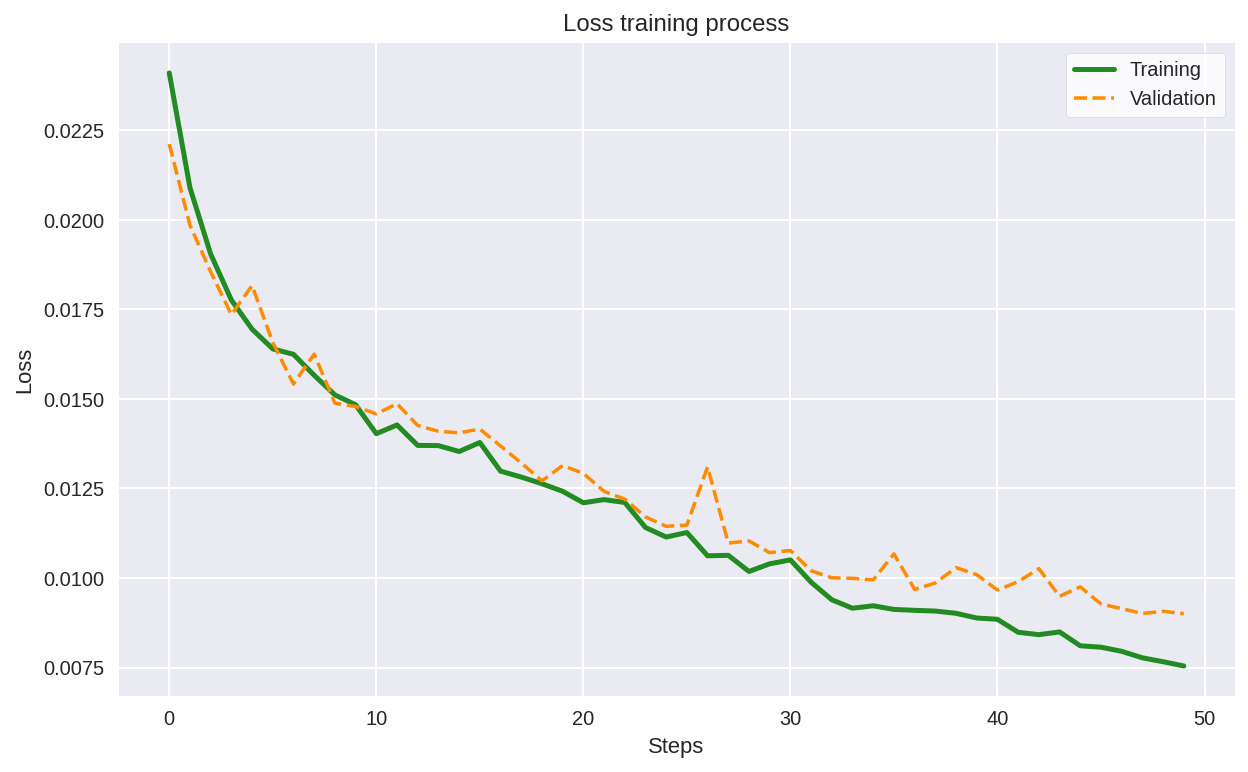

In [ ]:
#Plotting loss function
plt.figure(figsize = (10, 6))
with plt.style.context('seaborn'):
  plt.title('Loss training process')
  plt.xlabel('Steps')
  plt.ylabel('Loss')
  plt.plot(logs['loss'], c = 'forestgreen', linewidth = 2.5, label = 'Training')
  plt.plot(logs['val_loss'], c = 'darkorange', linestyle = '--', label = 'Validation')
  plt.legend(frameon = True, facecolor = 'white')
  plt.show()

In [ ]:
# Testing encoder
testXencoded = model.layers[3](model.layers[2](model.layers[1](testXnormal))).numpy()
print(f'Testing encoder: {testXencoded.shape}') #2914 // 8

Testing encoder: (258, 364)


In [ ]:
# Testing decoding (Reconstruction)
testXrecons = model.layers[6](model.layers[5](model.layers[4](testXencoded))).numpy()
print(f'Testing reconstruction: {testXrecons.shape}') #2914

Testing reconstruction: (258, 2914)


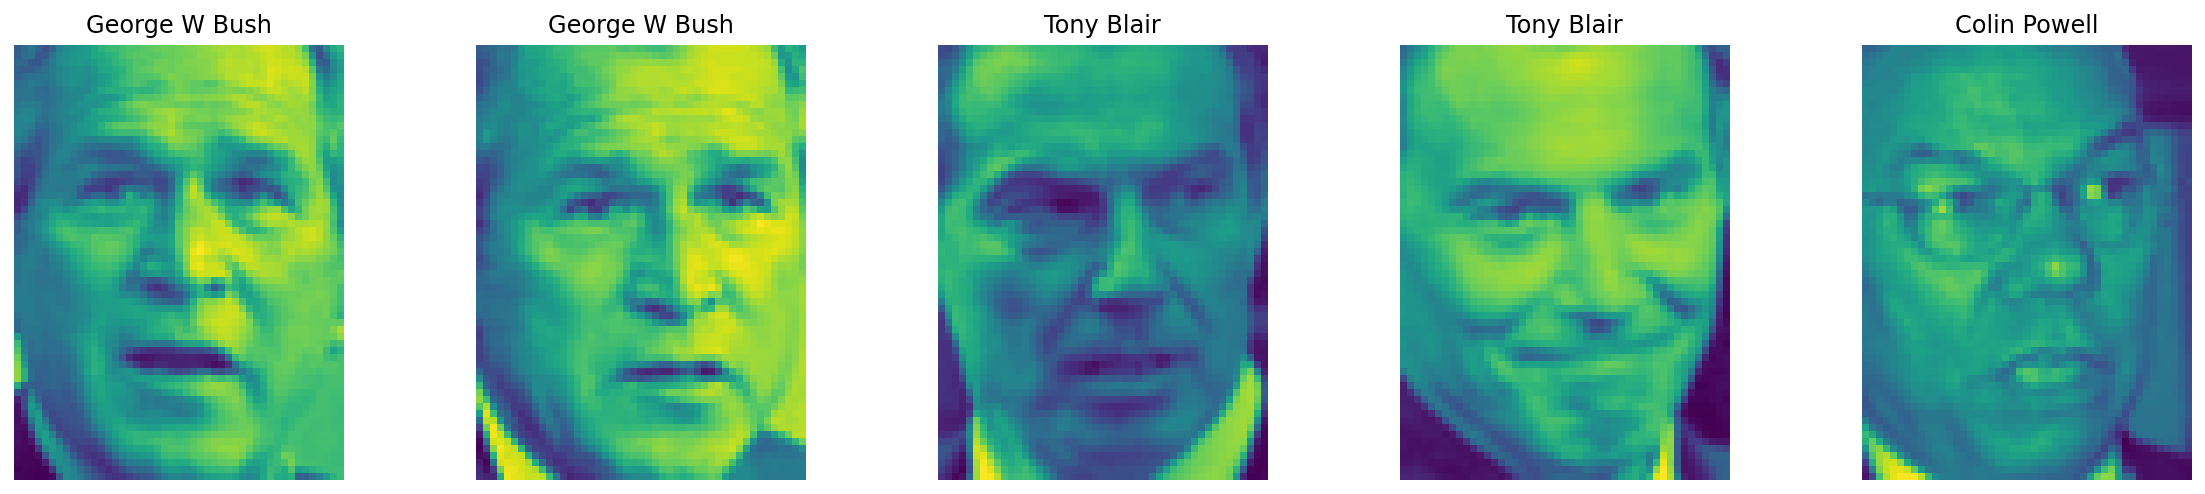

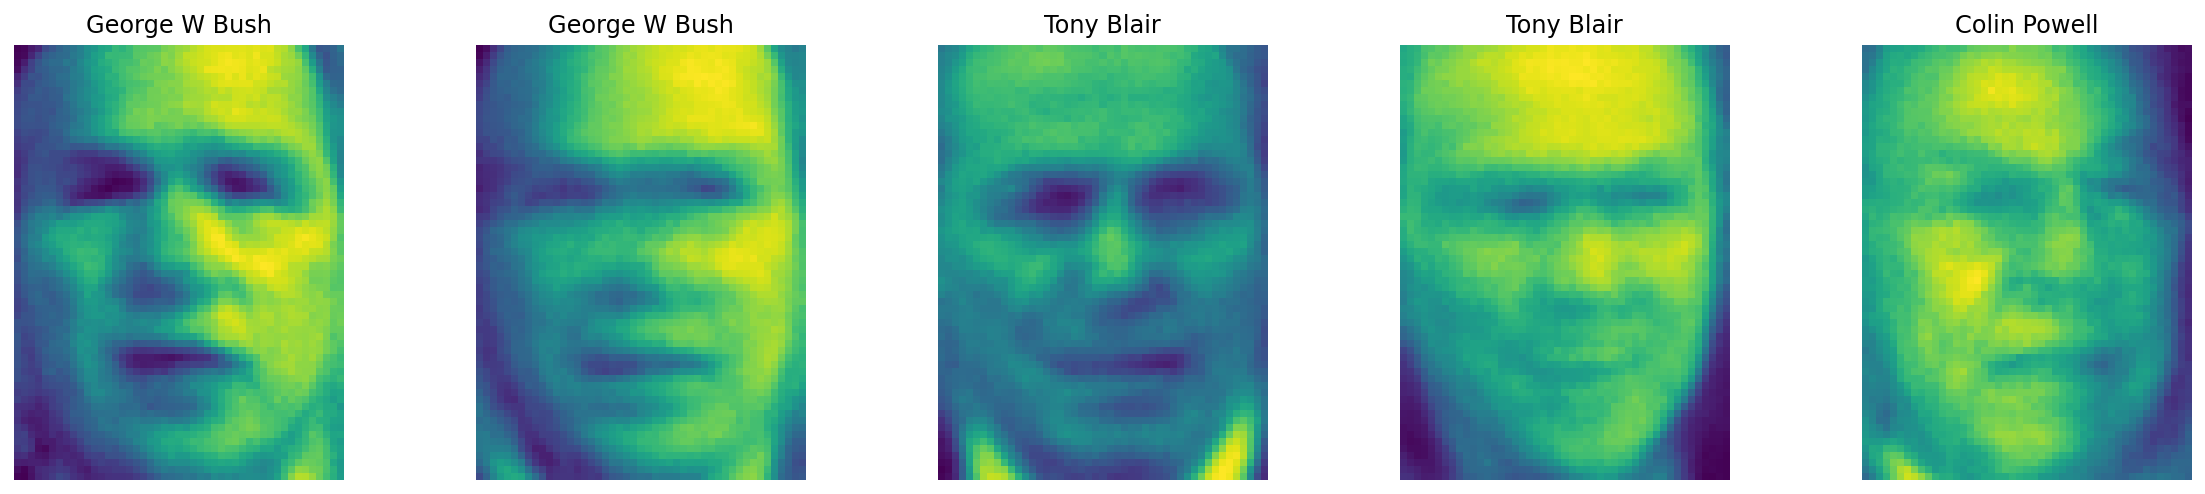

In [ ]:
# Show reconstruction images
n = 5
random = np.random.choice(testXencoded.shape[0], n)

exampleImage(testX, testY) #Real image
exampleImage(testXrecons, testY) #Reconstruction image

In [ ]:
# Genetic algorithm
persons = ['George W Bush', 'Donald Rumsfeld']
n = 10
indexP1 = np.where(testY == np.where(names == persons[0])[0][0])[0] #Get all index consist with name
indexP1 = np.random.choice(indexP1, n) #Random labels
indexP2 = np.where(testY == np.where(names == persons[1])[0][0])[0]
indexP2 = np.random.choice(indexP2, n)

newFaces = None

for i, j in zip(indexP1, indexP2):
  face1 = np.array(testXencoded[i])
  face1 = face1[:face1.shape[0] // 2] #First half face
  face2 = np.array(testXencoded[j])
  face2 = face2[face2.shape[0] // 2:] #Last half face
  face = np.hstack((face1, face2)).reshape(1, -1) #Combine two faces

  if newFaces is None:
    newFaces = face.copy()
  else:
    newFaces = np.vstack((newFaces, face))

# New faces sample
print(f'New faces sample shape: {newFaces.shape}')

New faces sample shape: (10, 364)


Faces reconstruction shape: (10, 2914)


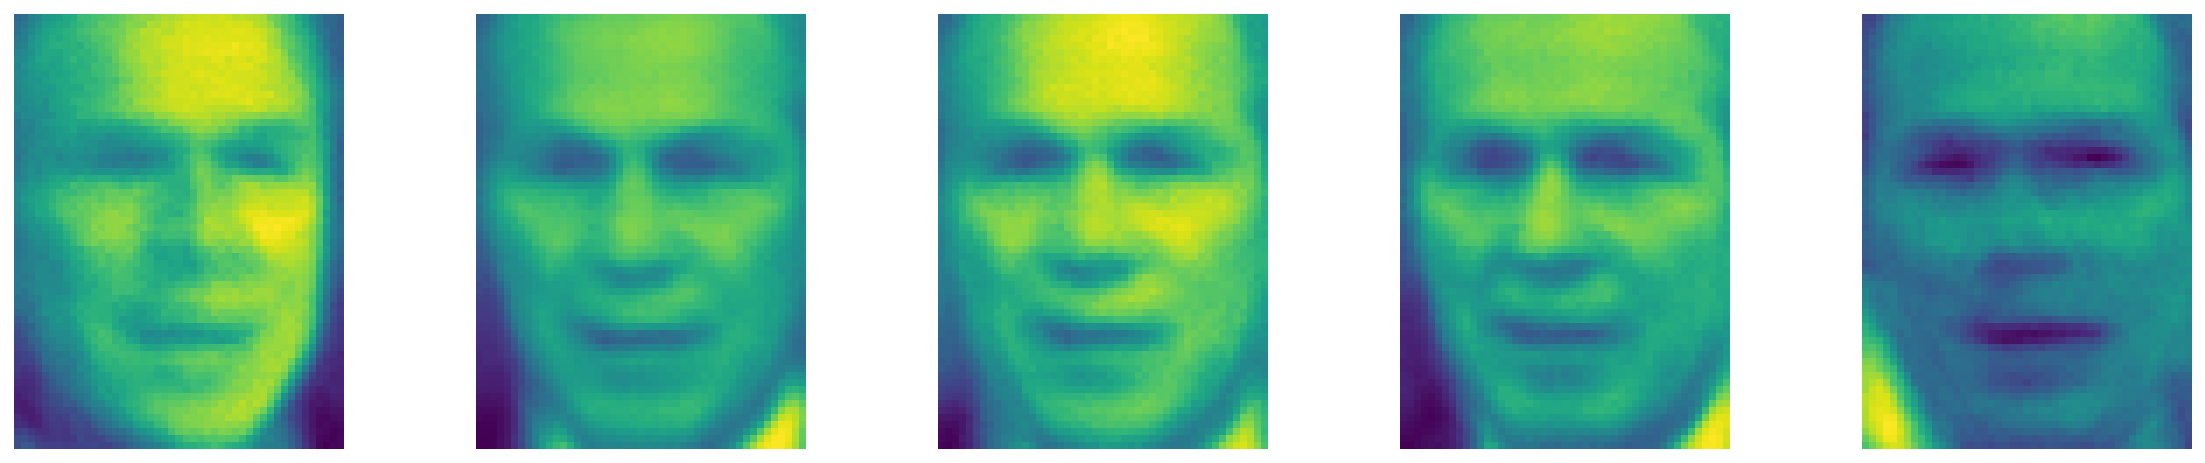

In [ ]:
# Reconstruction faces
facesRecons = model.layers[6](model.layers[5](model.layers[4](newFaces))).numpy()
print(f'Faces reconstruction shape: {facesRecons.shape}')

# Show example image
n = 5
plt.figure(figsize = (4 * n, 4))
for j, i in enumerate(np.random.choice(facesRecons.shape[0], n)):
  plt.subplot(1, n, j + 1)
  plt.imshow(facesRecons[i].reshape(62, -1)) #Images size (62 x 47)
  plt.axis('off')  
plt.show()